Socialinio draudimo pensijos
*****************

https://data.gov.lt/dataset/socialinio-draudimo-pensijos

Duomenų nuskaitymas
********************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pathlib import Path
from matplotlib.ticker import StrMethodFormatter

In [2]:
data_dir = Path().resolve().parents[3] / 'data'
data_dir

WindowsPath('C:/Users/evelina.zigmantaite/Desktop/08-16/notebooks/data')

In [94]:
import zipfile
with zipfile.ZipFile(data_dir / 'datasets/gov/vsdfv/pensijos/pensijos.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir / 'datasets/gov/vsdfv/pensijos/sodrapensijos') # PERVADINTI

In [95]:
# Koduočių ir skirtuko problema, todėl naudojame papildomas komandas encoding ir sep.
pensijos = pd.read_csv(data_dir / 'datasets/gov/vsdfv/pensijos/sodrapensijos/pensijos.csv', encoding='cp1257', sep=';')

Duomenų apžvalga
***********

In [96]:
pensijos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785683 entries, 0 to 785682
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   METU_MENUO        785683 non-null  object 
 1   PENSIJOS_RUSIS    785683 non-null  object 
 2   PENSIJOS_PORUSIS  785683 non-null  object 
 3   NET_DARB_GRUPE    785683 non-null  object 
 4   BIUDZETAS         785683 non-null  object 
 5   LYTIS             785683 non-null  object 
 6   AR_DIRBA          785683 non-null  object 
 7   AR_TURI_STAZA     785683 non-null  object 
 8   AMZIUS            785417 non-null  object 
 9   SAVIVALDYBE       785683 non-null  object 
 10  PRISK_SUMA_EUR    785683 non-null  float64
 11  GAVEJU_SK         785683 non-null  float64
dtypes: float64(2), object(10)
memory usage: 71.9+ MB


In [5]:
pensijos.nunique()

METU_MENUO              31
PENSIJOS_RUSIS           9
PENSIJOS_PORUSIS        12
NET_DARB_GRUPE           7
BIUDZETAS                1
LYTIS                    2
AR_DIRBA                 2
AR_TURI_STAZA            2
AMZIUS                  20
SAVIVALDYBE             61
PRISK_SUMA_EUR      304071
GAVEJU_SK             2876
dtype: int64

In [6]:
pensijos.head().T

,0,1,2,3,4
METU_MENUO,2020-01 mėn.,2020-01 mėn.,2020-01 mėn.,2020-01 mėn.,2020-01 mėn.
PENSIJOS_RUSIS,01. Senatvės pensijos,01. Senatvės pensijos,01. Senatvės pensijos,01. Senatvės pensijos,01. Senatvės pensijos
PENSIJOS_PORUSIS,-,-,-,-,-
NET_DARB_GRUPE,-,-,-,-,-
BIUDZETAS,VSDF biudžetas,VSDF biudžetas,VSDF biudžetas,VSDF biudžetas,VSDF biudžetas
LYTIS,Moteris,Moteris,Moteris,Moteris,Moteris
AR_DIRBA,Dirba,Dirba,Dirba,Dirba,Dirba
AR_TURI_STAZA,Turi,Turi,Turi,Turi,Turi
AMZIUS,60-65 m.,65-70 m.,70-75 m.,75-80 m.,80-85 m.
SAVIVALDYBE,Akmenės r. sav.,Akmenės r. sav.,Akmenės r. sav.,Akmenės r. sav.,Akmenės r. sav.


In [7]:
# Neteisingas datos formatas, todėl pridedame naują kintamąjį 'LAIKAS' su teisingu datos formatu
pensijos['LAIKAS'] = pd.to_datetime(pensijos['METU_MENUO'], format = '%Y-%m mėn.') 

In [8]:
# Kodėl 'PENSIJOS_PORUSIS' išskirta būtent ta grupė 'Našliai iki  95-01-01', 'Našliai po  95-01-01' Koks ivykis 1995 m.? Ką reiškia rūšis '-' ?
pensijos['PENSIJOS_PORUSIS'].unique()

array(['-', 'Našlaičiai', 'Našliai iki  95-01-01', 'Našliai po  95-01-01',
       'Invalidumo/netekto darbingumo', 'Išankstinės senatvės',
       'Kompensacijos už ypatingas darbo sąlygas', 'Maitintojo netekimo',
       'Našlių ir našlaičių', 'Senatvės', 'Ištarnauto laiko',
       'Netekto darbingumo pensija'], dtype=object)

In [9]:
# Kodėl 'NET_DARB_GRUPE' grupės išskiriamos dviem būdais : ir procentais, ir grupėmis.
pensijos['NET_DARB_GRUPE'].unique()

array(['-', 'I grupė', 'II grupė', 'III grupė', '45-55 proc.',
       '60-70 proc.', '75-100 proc.'], dtype=object)

In [99]:
# Pridedame naują kintamąjį 'VIDURKIS', kuris leis mums atlikti informatyvesnius skaičiavimus
pensijos['VIDURKIS'] = pensijos['PRISK_SUMA_EUR']/pensijos['GAVEJU_SK']

DUOMENŲ ANALIZĖ
*********************

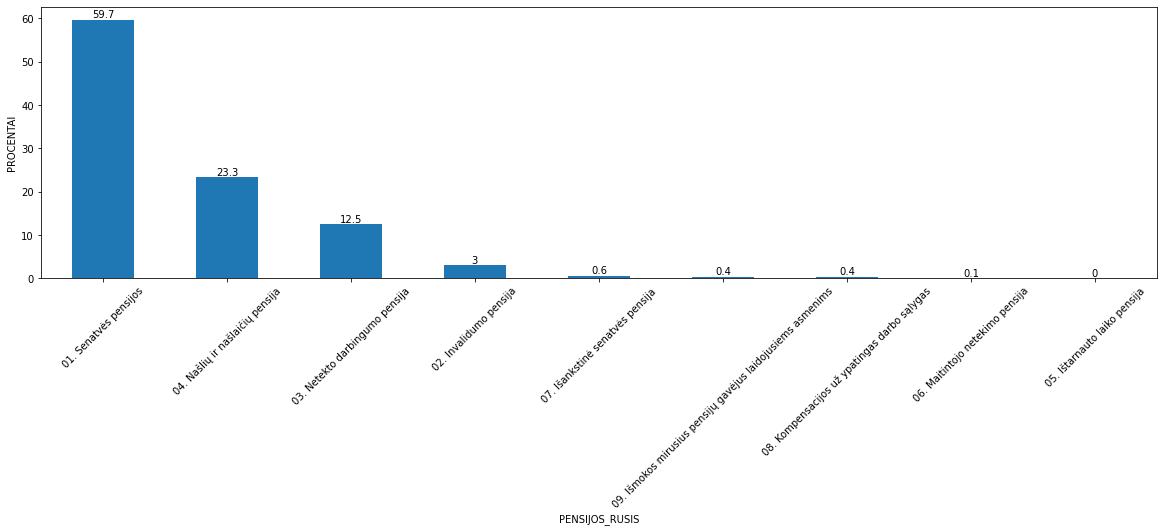

In [11]:
# Kokia pensijų rūšis yra populiariausia?
mpl.rc('figure', figsize=(20,5))
temp_df = round((pensijos.groupby('PENSIJOS_RUSIS')['GAVEJU_SK'].sum().sort_values(ascending=False) 
           / pensijos.groupby('PENSIJOS_RUSIS')['GAVEJU_SK'].sum().sort_values(ascending=False).sum())*100,1)
ax = temp_df.plot(kind='bar', rot = 45)
ax.bar_label(ax.containers[0])
plt.ylabel('PROCENTAI')
plt.show()

,GAVEJU_SK
LYTIS,
Moteris,12492858.0
Vyras,6430163.0


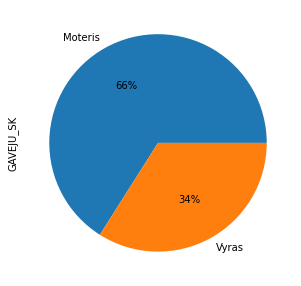

In [12]:
#Senatvės pensijų išmokų gavėjų skaičius pagal lytį:
pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('LYTIS')['GAVEJU_SK'].sum().plot(kind = 'pie', autopct='%1.0f%%')
pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('LYTIS')['GAVEJU_SK'].sum().to_frame()

In [13]:
# Vidutinis senatvės pensijų dydis pagal lytį:
pd.options.display.float_format = '{:,.2f}'.format
pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('LYTIS')['PRISK_SUMA_EUR'].sum()/pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('LYTIS')['GAVEJU_SK'].sum()

LYTIS
Moteris   386.11
Vyras     459.38
dtype: float64

In [14]:
# Vidutinių senatvės pensijų dydžių (pagal lytį) skirtumas procentais:
round(((459.48 - 386.11) / 459.38 ) * 100)

16

In [15]:
# Kokia suma senatvės pensijų išmokama per metus?
pd.options.display.float_format = '{:,.2f}'.format
pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].set_index('LAIKAS').resample('Y')['PRISK_SUMA_EUR'].sum()

LAIKAS
2020-12-31   2,766,642,288.28
2021-12-31   3,025,438,845.18
2022-12-31   1,985,393,929.18
Freq: A-DEC, Name: PRISK_SUMA_EUR, dtype: float64

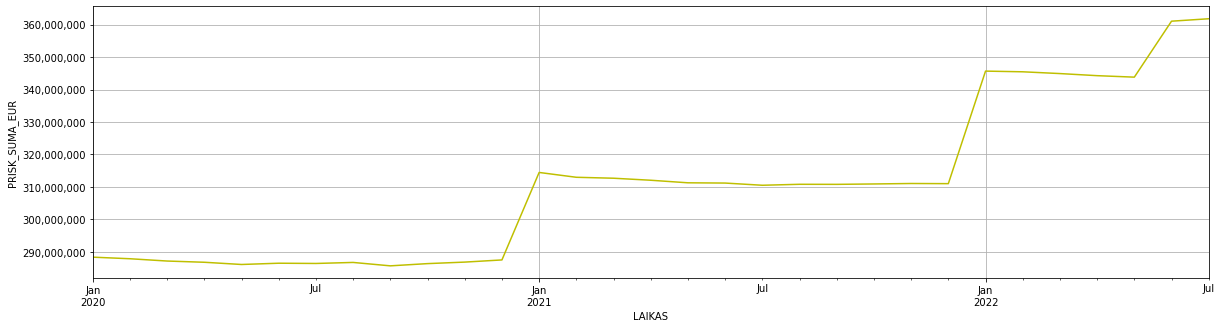

In [16]:
# Kokia suma senatvės pensijų išmokama kas mėnesį?
mpl.rc('figure', figsize=(20,5))
ax = pensijos.set_index('LAIKAS').resample('M')['PRISK_SUMA_EUR'].sum().plot(grid = True, c = 'y')
ax.yaxis.set_major_formatter(StrMethodFormatter( '{x:,.0f}'))
plt.ylabel('PRISK_SUMA_EUR')
plt.show()
#kiekvienais metais sausį įvyksta pakilimas

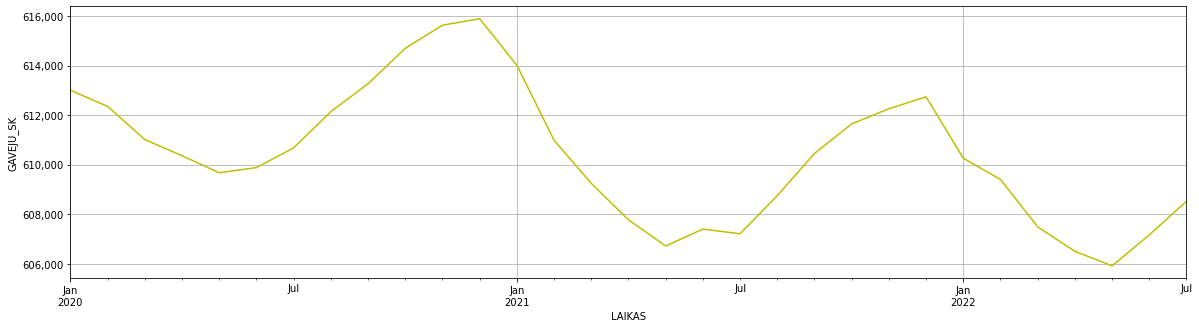

In [17]:
# Koks yra senatvės pensijų gavėjų skaičius kas mėnesį?
mpl.rc('figure', figsize=(20,5))
ax = pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].set_index('LAIKAS').resample('M')['GAVEJU_SK'].sum().plot(grid = True, c = 'y')
ax.yaxis.set_major_formatter(StrMethodFormatter( '{x:,.0f}'))
plt.ylabel('GAVEJU_SK')
plt.show()
# Kodėl kiekvienais metais įvyksta pakilimas prieš metų pabaigą?

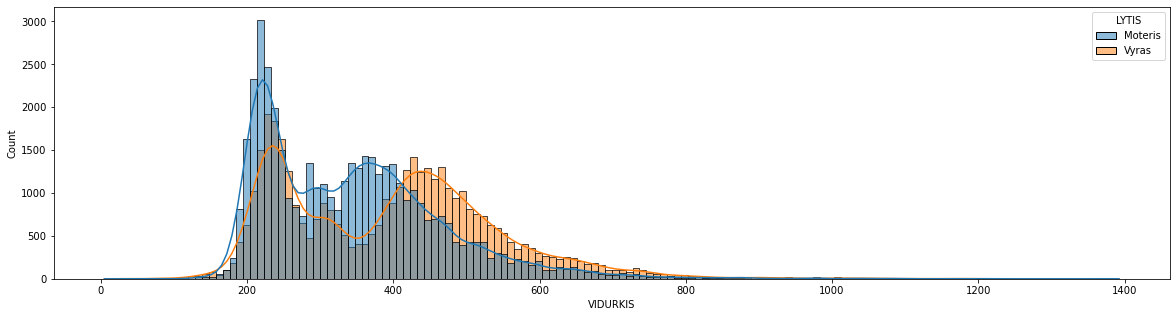

In [18]:
# Senatvės pensijos dydžio pasiskirtymas pagal lytį: 
mpl.rc('figure', figsize=(20,5))
sns.histplot(data =pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'], x = 'VIDURKIS', hue = 'LYTIS', kde = True)
plt.show()

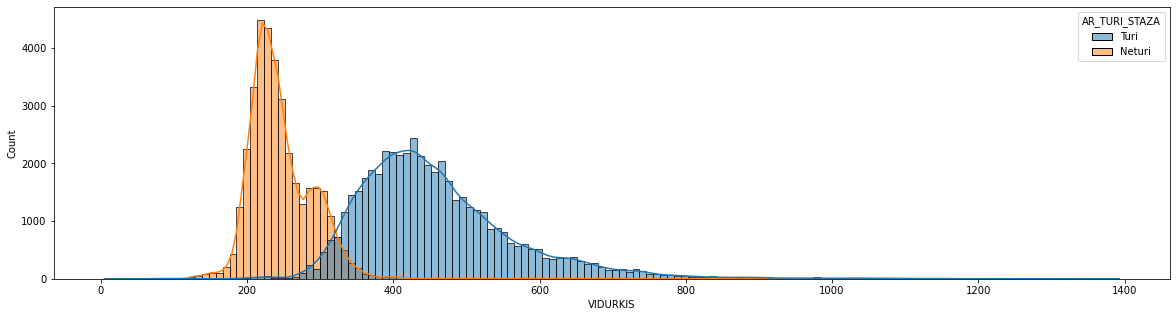

In [19]:
# Senatvės pensijos dydzio pasiskirtymas pagal tai, ar pensijos gavėjas turi stažą, ar ne:
sns.histplot(data = pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'], x = 'VIDURKIS', hue = 'AR_TURI_STAZA', kde = True)
plt.show()

In [20]:
# Vidutinis senatvės pensijų dydis pagal tai, ar pensijos gavėjas turi stažą:
pd.options.display.float_format = '{:,.2f}'.format
pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('AR_TURI_STAZA')['PRISK_SUMA_EUR'].sum()/pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'].groupby('AR_TURI_STAZA')['GAVEJU_SK'].sum()

AR_TURI_STAZA
Neturi   238.89
Turi     433.13
dtype: float64

In [21]:
# Vidutinių senatvės pensijų dydžių (pagal tai, ar pensijos gavėjas turi stažą) skirtumas procentais:
round(((433.13 - 238.89) / 433.13 ) * 100)

45

PAPILDOMAI (iš "Socialinio draudimo pensijos")
**********

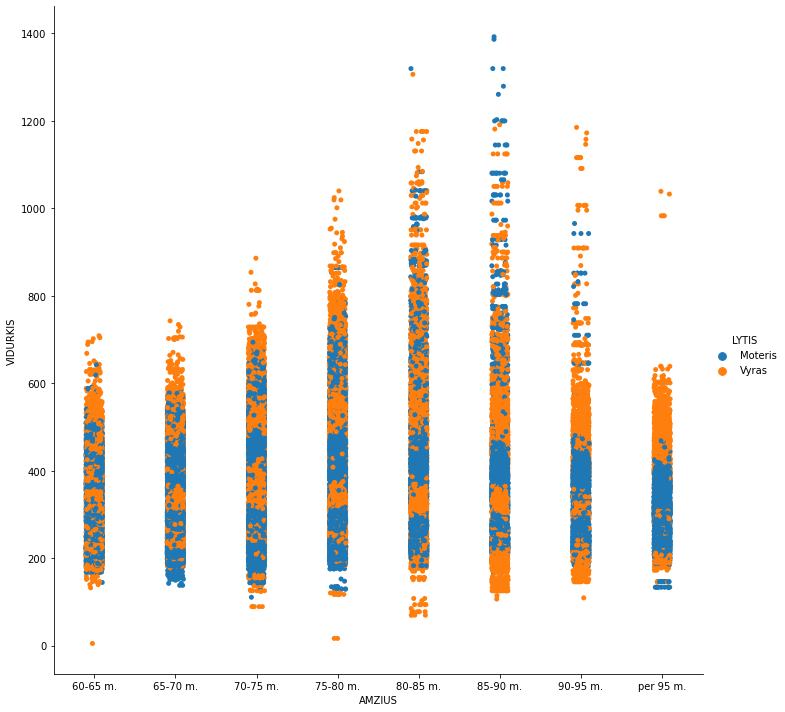

In [103]:
# Senatvės pensijos vidurkių pasiskirstymas pagal lytį ir amžių:
sns.catplot(data=pensijos[pensijos['PENSIJOS_RUSIS'] == '01. Senatvės pensijos'], x='AMZIUS', y='VIDURKIS', hue='LYTIS', sharey=False, kind = 'strip', height=10)

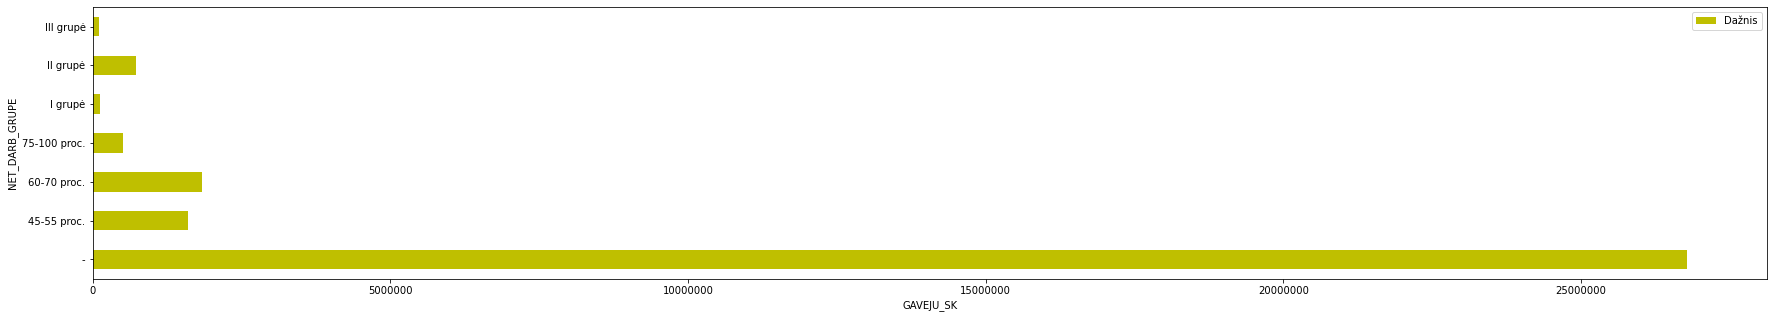

In [23]:
# Netekto darbingumo grupės pagal gyventojų skaičių:
mpl.rc('figure', figsize=(30,5))
pagal_grupe = pensijos.groupby('NET_DARB_GRUPE')['GAVEJU_SK'].sum()
plt.ticklabel_format(style = 'plain')
plt.xlabel('GAVEJU_SK')
pagal_grupe.plot.barh(color = 'y').legend(labels=['Dažnis'])

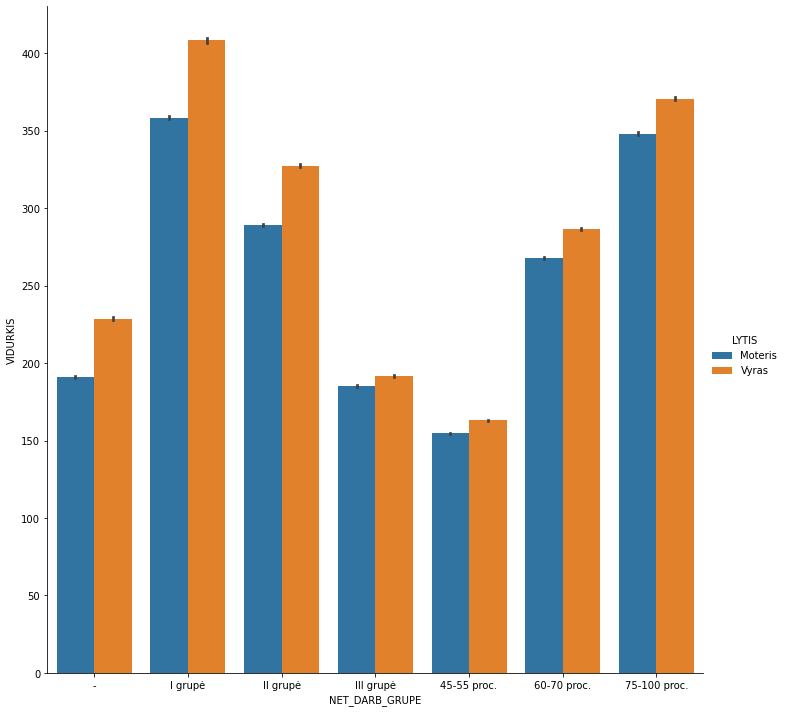

In [24]:
# Gaunamų pensijų vidurkių pasiskirstymas pagal lytį ir netekto darbingumo grupę:
sns.catplot(data= pensijos, x='NET_DARB_GRUPE', y='VIDURKIS', hue='LYTIS', kind = 'bar', height=10)

PAPILDOMAI (iš "Vidutinės apdraustųjų pajamos : Apdraustųjų pajamų analizė")'
****************************

https://data.gov.lt/dataset/vidutines-apdraustuju-pajamosimport

In [81]:
import zipfile
with zipfile.ZipFile(data_dir / 'datasets/gov/vsdfv/vap/apdraustuju_pajamu_analize.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir / 'datasets/gov/vsdfv/vap') # PERVADINTI

In [25]:
# pajamu_analize = pd.read_csv(data_dir / 'datasets/gov/vsdfv/vap/PajamuAnalize.csv', encoding='cp1257', sep=';')

In [26]:
pajamu_analize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164716 entries, 0 to 1164715
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   metai            1164716 non-null  float64
 1   mėnuo            1164716 non-null  float64
 2   amžius           1164716 non-null  float64
 3   lytis            1164716 non-null  object 
 4   savivaldybe      1164716 non-null  object 
 5   mėnesio pajamos  1164716 non-null  float64
dtypes: float64(4), object(2)
memory usage: 53.3+ MB


In [27]:
pajamu_analize.nunique()

metai                   1
mėnuo                   1
amžius                 88
lytis                   2
savivaldybe            61
mėnesio pajamos    319424
dtype: int64

In [28]:
pajamu_analize.head().T

,0,1,2,3,4
metai,"2,022.00","2,022.00","2,022.00","2,022.00","2,022.00"
mėnuo,7.00,7.00,7.00,7.00,7.00
amžius,24.00,41.00,50.00,52.00,61.00
lytis,Vyras,Vyras,Moteris,Vyras,Moteris
savivaldybe,Pasvalio r. sav.,Pasvalio r. sav.,Pasvalio r. sav.,Pasvalio r. sav.,Pasvalio r. sav.
mėnesio pajamos,"1,278.56","1,094.34",70.00,803.20,"1,713.83"


In [29]:
pajamu_analize['laikas'] = pd.to_datetime(pajamu_analize['metai'], format = '%Y')# ?????????????
# pajamu_analize['laikas'] = pd.to_datetime(pajamu_analize['mėnuo'], format = '%m')# ?????????????
# pakeisti menesi ir amziu

In [83]:
pajamu_analize

,metai,mėnuo,amžius,lytis,savivaldybe,mėnesio pajamos,laikas,grupe
0,"2,022.00",7.00,24.00,Vyras,Pasvalio r. sav.,"1,278.56",2022-01-01,18-35 m.
1,"2,022.00",7.00,41.00,Vyras,Pasvalio r. sav.,"1,094.34",2022-01-01,36-64 m.
2,"2,022.00",7.00,50.00,Moteris,Pasvalio r. sav.,70.00,2022-01-01,36-64 m.
3,"2,022.00",7.00,52.00,Vyras,Pasvalio r. sav.,803.20,2022-01-01,36-64 m.
4,"2,022.00",7.00,61.00,Moteris,Pasvalio r. sav.,"1,713.83",2022-01-01,36-64 m.
...,...,...,...,...,...,...,...,...
1164711,"2,022.00",7.00,33.00,Moteris,Vilniaus m. sav.,"1,212.00",2022-01-01,18-35 m.
1164712,"2,022.00",7.00,36.00,Moteris,Vilniaus m. sav.,"1,926.86",2022-01-01,36-64 m.
1164713,"2,022.00",7.00,35.00,Moteris,Vilniaus m. sav.,"1,700.00",2022-01-01,18-35 m.
1164714,"2,022.00",7.00,37.00,Vyras,Vilniaus m. sav.,"9,722.37",2022-01-01,36-64 m.


In [32]:
# Vidutinis pajamų dydis pagal lytį: 
pajamu_analize.groupby('lytis')['mėnesio pajamos'].mean()

lytis
Moteris   1,624.18
Vyras     1,861.43
Name: mėnesio pajamos, dtype: float64

In [33]:
# Vidutinių pajamų dydžių (pagal lytį) skirtumas procentais:
round(((1861.43 - 1624.18) / 1861.43 ) * 100)

13

In [34]:
# Iš stulpelio 'amžius' reikšmių sudarome naują stulpelį 'grupe', kuriame amžius suskirstytas į keturias grupes:
def calc_new_col(pajamu_analize):
   if pajamu_analize['amžius'] < 18 :
        return 'Nepilnametis'
   if (pajamu_analize['amžius'] >= 18) & (pajamu_analize['amžius'] < 36)  :
        return ' 18-35 m.'
   if (pajamu_analize['amžius'] >= 36) & (pajamu_analize['amžius'] < 65)  :
        return ' 36-64 m.'
   if (pajamu_analize['amžius'] >= 65)  :
        return ' 65 m. +'
pajamu_analize["grupe"] = pajamu_analize.apply(calc_new_col, axis=1)

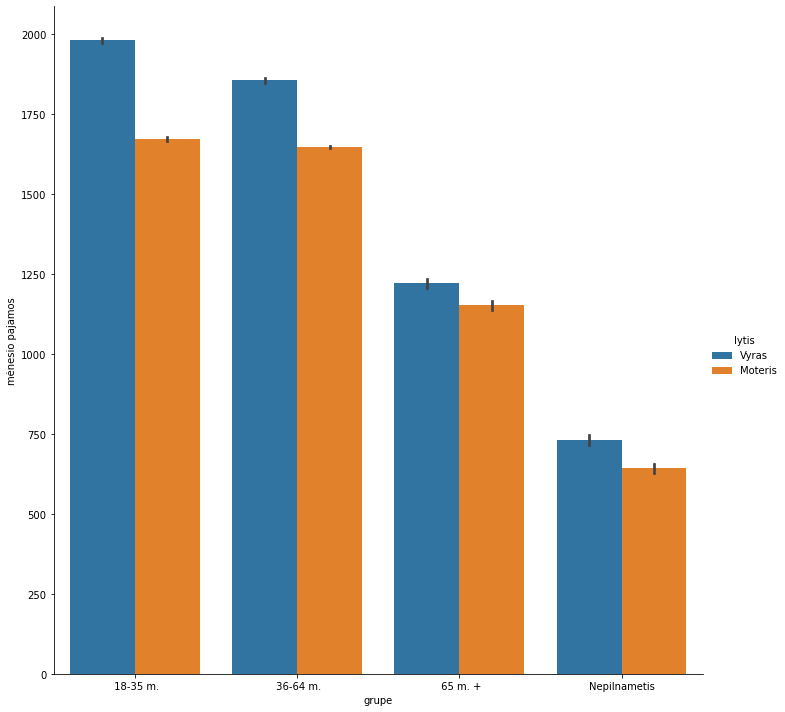

In [37]:
# Gaunamų pajamų pasiskirstymas pagal lytį ir amžiaus grupę:
sns.catplot(data= pajamu_analize, x='grupe', y='mėnesio pajamos', hue='lytis', kind = 'bar', height=10)

PAPILDOMAI (iš "Vidutinės apdraustųjų pajamos : Vidutinės apdraustųjų pajamos")'
****************************

https://data.gov.lt/dataset/vidutines-apdraustuju-pajamosimport

In [82]:
import zipfile
with zipfile.ZipFile(data_dir / 'datasets/gov/vsdfv/vap/apdraustieji_det.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir / 'datasets/gov/vsdfv/vap') # PERVADINTI

In [44]:
# apdraustieji_det = pd.read_csv(data_dir / 'datasets/gov/vsdfv/vap/Apdraustas.csv', encoding='cp1257', sep=';')

In [88]:
apdraustieji_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565879 entries, 0 to 565878
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   AGREGAVIMAS        565879 non-null  object        
 1   METU_MENUO         565879 non-null  object        
 2   APDRAUSTUJU_RUSIS  565879 non-null  object        
 3   DRAUDEJO_GRUPE     5121 non-null    object        
 4   DRAUDEJO_TIPAS     20231 non-null   object        
 5   SAVIVALDYBE        475742 non-null  object        
 6   LYTIS              319714 non-null  object        
 7   AMZIUS             43386 non-null   object        
 8   DARBO_UZMOK_EUR    159269 non-null  float64       
 9   APDR_ASM_SK        565879 non-null  float64       
 10  LAIKAS             565879 non-null  datetime64[ns]
 11  VIDURKIS           159269 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 51.8+ MB


In [45]:
apdraustieji_det.nunique()

AGREGAVIMAS               8
METU_MENUO              151
APDRAUSTUJU_RUSIS        36
DRAUDEJO_GRUPE            2
DRAUDEJO_TIPAS           27
SAVIVALDYBE              61
LYTIS                     3
AMZIUS                   20
DARBO_UZMOK_EUR      116773
APDR_ASM_SK           22079
dtype: int64

In [46]:
apdraustieji_det.head()

,AGREGAVIMAS,METU_MENUO,APDRAUSTUJU_RUSIS,DRAUDEJO_GRUPE,DRAUDEJO_TIPAS,SAVIVALDYBE,LYTIS,AMZIUS,DARBO_UZMOK_EUR,APDR_ASM_SK
0,"Draudėjų grupė, apdraustųjų rūšys",2010-01 mėn.,Apdraustieji visomis valstybinio socialinio dr...,Kiti draudėjai,NaN,NaN,NaN,NaN,"406,526,120.44","914,052.00"
1,"Draudėjų grupė, apdraustųjų rūšys",2010-01 mėn.,Apdraustieji visomis valstybinio socialinio dr...,"Valstybės, biudžetinės įstaigos",NaN,NaN,NaN,NaN,"127,385,656.89","346,662.00"
2,"Draudėjų tipai, apdraustųjų rūšys",2010-01 mėn.,Apdraustieji visomis valstybinio socialinio dr...,NaN,"01. Asmenys, vykdantys individualią žemės ūkio...",NaN,NaN,NaN,"1,666,753.02","10,402.00"
3,"Draudėjų tipai, apdraustųjų rūšys",2010-01 mėn.,Apdraustieji visomis valstybinio socialinio dr...,NaN,"03. Advokatai, advokatų padėjėjai, notarai, an...",NaN,NaN,NaN,"582,506.66","1,813.00"
4,"Draudėjų tipai, apdraustųjų rūšys",2010-01 mėn.,Apdraustieji visomis valstybinio socialinio dr...,NaN,"04. Asmenys, vykdantys individualią veiklą",NaN,NaN,NaN,"335,939.68","2,967.00"


In [62]:
# Neteisingas datos formatas, todėl pridedame naują kintamąjį 'LAIKAS' su teisingu datos formatu
apdraustieji_det['LAIKAS'] = pd.to_datetime(apdraustieji_det['METU_MENUO'], format = '%Y-%m mėn.') 

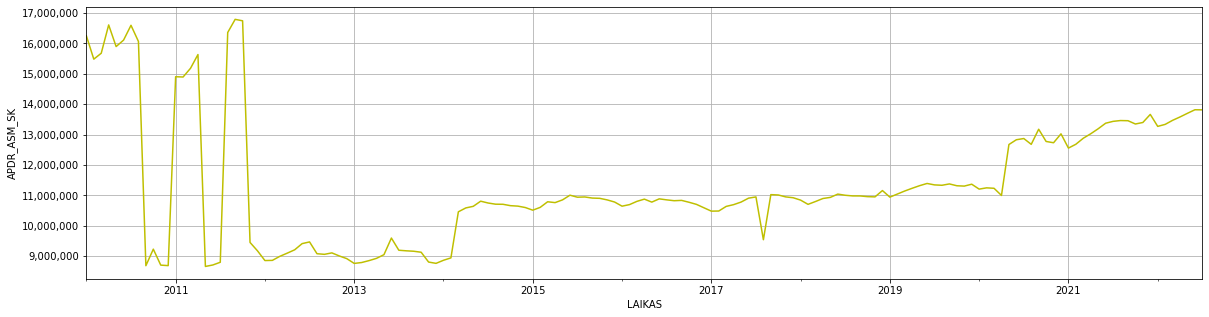

In [48]:
# Kiek apdraustųjų yra kas mėnesį?
mpl.rc('figure', figsize=(20,5))
ax = apdraustieji_det.set_index('LAIKAS').resample('M')['APDR_ASM_SK'].sum().plot(grid = True, c = 'y')
ax.yaxis.set_major_formatter(StrMethodFormatter( '{x:,.0f}'))
plt.ylabel('APDR_ASM_SK')
plt.show()
# Kodėl ties 2011 m. tokie staigūs kritimai ir kilimai?

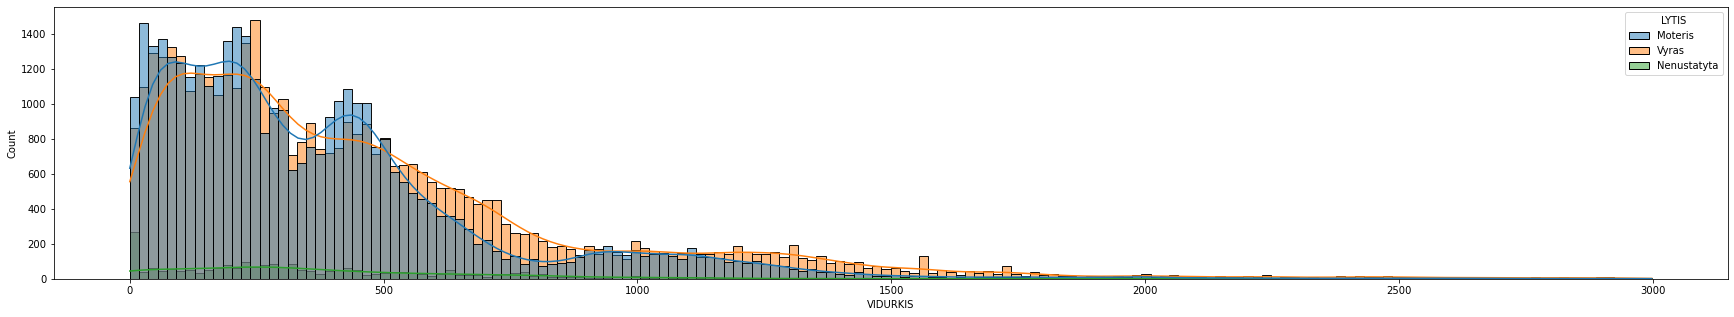

In [60]:
# Darbo užmokesčio vidurkių pasiskirtymas pagal lytį:
sns.histplot(data = apdraustieji_det[apdraustieji_det['VIDURKIS'] < 3000], x = 'VIDURKIS', hue = 'LYTIS', kde = True)
plt.show()

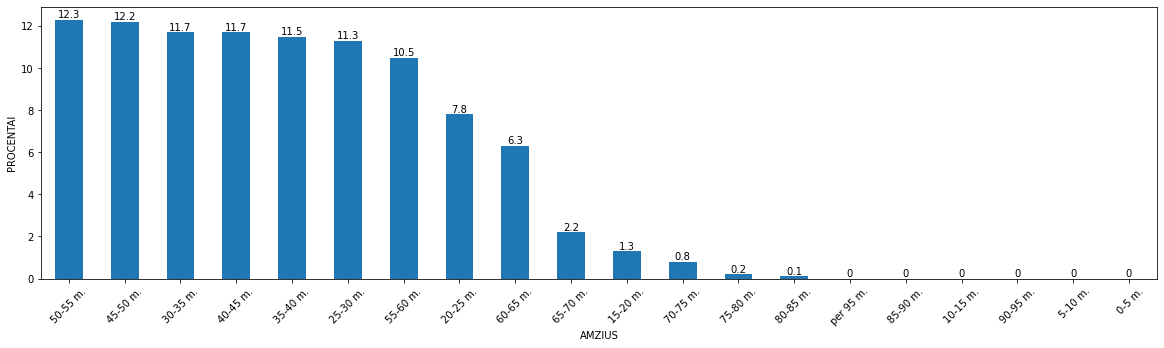

In [52]:
# Kuri amžiaus grupė draudžasi dažniausiai?
mpl.rc('figure', figsize=(20,5))
temp_df = round((apdraustieji_det.groupby('AMZIUS')['APDR_ASM_SK'].sum().sort_values(ascending=False)
           / apdraustieji_det.groupby('AMZIUS')['APDR_ASM_SK'].sum().sort_values(ascending=False).sum())*100, 1)
ax = temp_df.plot(kind='bar', rot = 45)
ax.bar_label(ax.containers[0])
plt.ylabel('PROCENTAI')
plt.show()